In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
redwine=pd.read_csv("winequality-red.csv")

In [3]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data=pd.DataFrame(data=redwine)

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


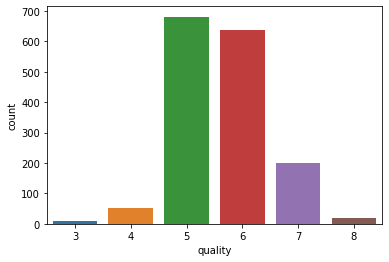

In [8]:
sns.countplot(x='quality', data=data)

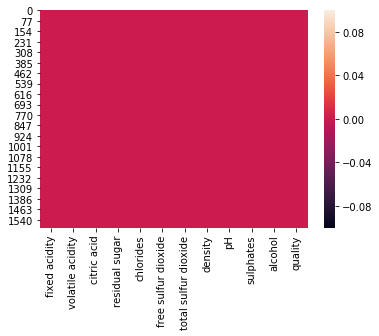

In [9]:
sns.heatmap(data.isnull())

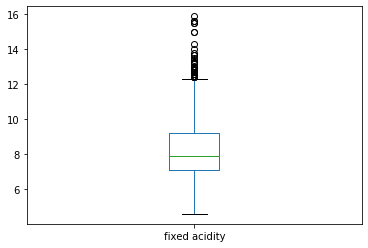

In [10]:
data["fixed acidity"].plot.box()

In [11]:
x=data.iloc[:,:11]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [12]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [14]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

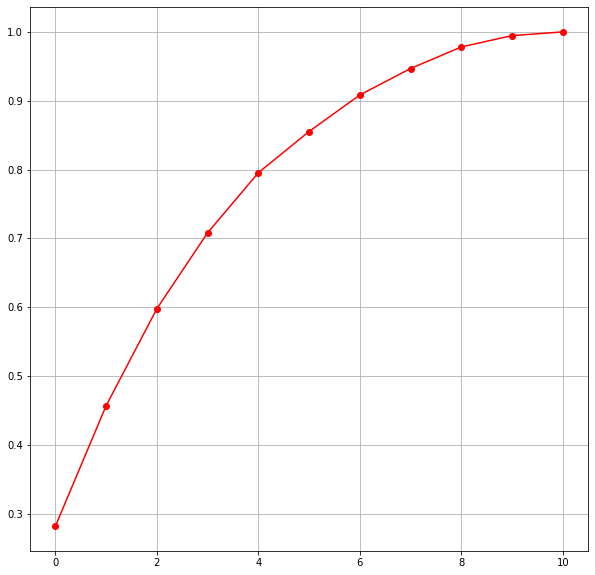

In [15]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [16]:
reviews = []
for i in data["quality"]:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [17]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [18]:
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [19]:
y = data['Reviews']

In [20]:
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [21]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [22]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [23]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.3,random_state=45)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 8)
(1119,)
(480, 8)
(480,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [28]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  2   3   0]
 [  0 459  11]
 [  0   4   1]]
96.25


In [29]:
def lr():
    KN=KNeighborsClassifier()
    KN.fit(x_train,y_train)
    KN.score(x_train,y_train)
    predKN=KN.predict(x_test)
    print(accuracy_score(y_test,predKN))
    print(confusion_matrix(y_test,predKN))
    print(classification_report(y_test,predKN))



In [30]:
lr()

0.9791666666666666
[[  0   5   0]
 [  0 470   0]
 [  0   5   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.98      1.00      0.99       470
           3       0.00      0.00      0.00         5

    accuracy                           0.98       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.96      0.98      0.97       480



In [31]:
from sklearn.externals import joblib
joblib.dump(lr,"lrsave")

['lrsave']

In [32]:
import pickle
s=pickle.dumps(lr)
clf2=pickle.loads(s)